Iris-Dataset

In [264]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

##IMPORTING DATA

In [265]:
dataset_train = pd.read_csv('iris.csv')

In [266]:
dataset_train

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##ADDING TARGET COLUMN

In [267]:
conditions=[
    (dataset_train['class']=='Iris-setosa'),
    (dataset_train['class']=='Iris-versicolor'),
    (dataset_train['class']=='Iris-virginica')
]
values=[1,2,3]
dataset_train['target']=np.select(conditions,values)

In [268]:
dataset_train

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class,target
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3
146,6.3,2.5,5.0,1.9,Iris-virginica,3
147,6.5,3.0,5.2,2.0,Iris-virginica,3
148,6.2,3.4,5.4,2.3,Iris-virginica,3


##DIVIDING DATASET IN IRISES

In [269]:
D1=dataset_train[dataset_train.target==1]
D2=dataset_train[dataset_train.target==2]
D3=dataset_train[dataset_train.target==3]

In [270]:
X=dataset_train.drop(['target','class'],axis='columns')
X.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [271]:
y=dataset_train.target
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: target, Length: 150, dtype: int32>

In [272]:
X1=D1.drop(['target','class'],axis='columns')
X2=D2.drop(['target','class'],axis='columns')
X3=D3.drop(['target','class'],axis='columns')
Y1=D1.target
Y2=D2.target
Y3=D3.target

##SPLITING THE DATA

In [273]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
len(X_train)

120

##TRAINING DATA

In [274]:
classifier = SVC(kernel="poly")
classifier.fit(X_train,y_train)


SVC(kernel='poly')

##PREDICTING DATA

In [275]:
y_pred1=classifier.predict(X1)
y_pred2=classifier.predict(X2)
y_pred3=classifier.predict(X3)

##CLASSIFICATION REPORT

In [276]:
print(classification_report(Y1,y_pred1))
print(classification_report(Y2,y_pred2))
print(classification_report(Y3,y_pred3))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        50
           3       0.00      0.00      0.00         0

    accuracy                           0.94        50
   macro avg       0.50      0.47      0.48        50
weighted avg       1.00      0.94      0.97        50

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



##F1 SCORES

In [277]:
f_score=[f1_score(Y1,y_pred1,pos_label=1),f1_score(Y2,y_pred2,pos_label=2),f1_score(Y3,y_pred3,pos_label=3)]

##PRECISION

In [278]:
p_score=[precision_score(Y1,y_pred1,pos_label=1),precision_score(Y2,y_pred2,pos_label=2),precision_score(Y3,y_pred3,pos_label=3)]
p_labels=['Iris-setosa','Iris-versicolor','Iris-virginica']

##GRAPH

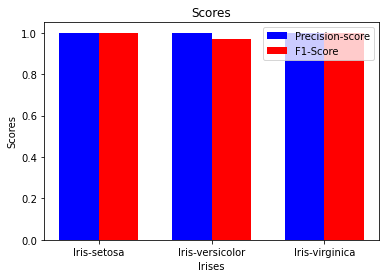

In [279]:
import matplotlib.pyplot as plt
data = [p_score,f_score]
x = np.arange(len(p_labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data[0],width,color = 'b',label='Precision-score')
rects2 = ax.bar(x + width/2, data[1],width,color = 'r',label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Scores')
ax.set_xlabel('Irises')
ax.set_xticks(x)
ax.set_xticklabels(p_labels)
ax.legend()
plt.show()